# Central Limit Theorem

Imagine that you want to know the mean height of everybody in Reno, NV. Since it is completely impractical to go out and measure the height of all 250,000+ of us, you would have to rely on sample data (randomly sampled) to estimate this parameter.  

The central limit theorem here says that every single possible mean we could get from our samples follows a normal distribution with a mean equal to the population mean; so long as our sample size is large enough. The distribution of every possibile sample mean is called the sample mean distribution.  

To illustrate, suppose I go out and randomly measure 30 people and take the mean of their heights. Then I go out and do it again for another 30 people. And another. And so on until I get every single possible combination of 30 people and their mean heights. Each mean height from all the groups I measured forms the sampling distribution. Each mean of 30 people consititutes a single data point in this distribution (ignoring continuity issues with that statement for now). 

Also, these samples typically need to be done with replacement unless the samples taken are less than about 10% of the population.

So let's look at an example.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(10)

# Generating random height (in inches) data for 250k people

In [8]:
random_data = [np.random.randint(40, 90) for x in range(250000)]

In [9]:
random_data

[49,
 76,
 55,
 40,
 89,
 68,
 65,
 69,
 88,
 69,
 89,
 48,
 49,
 40,
 82,
 80,
 76,
 56,
 76,
 87,
 51,
 64,
 83,
 73,
 48,
 76,
 54,
 89,
 53,
 45,
 53,
 65,
 53,
 68,
 62,
 70,
 70,
 65,
 52,
 41,
 71,
 76,
 67,
 58,
 69,
 53,
 62,
 63,
 70,
 51,
 68,
 50,
 64,
 49,
 55,
 58,
 56,
 47,
 64,
 51,
 57,
 86,
 47,
 51,
 68,
 73,
 60,
 72,
 64,
 84,
 45,
 44,
 47,
 64,
 64,
 84,
 74,
 80,
 55,
 53,
 64,
 55,
 46,
 61,
 82,
 62,
 51,
 88,
 52,
 68,
 72,
 89,
 55,
 84,
 80,
 82,
 85,
 83,
 73,
 85,
 80,
 65,
 49,
 77,
 40,
 58,
 63,
 43,
 69,
 56,
 60,
 58,
 88,
 54,
 55,
 57,
 65,
 86,
 88,
 82,
 57,
 72,
 57,
 81,
 56,
 81,
 66,
 52,
 70,
 57,
 57,
 56,
 40,
 71,
 77,
 49,
 40,
 78,
 62,
 72,
 42,
 43,
 71,
 75,
 67,
 58,
 53,
 83,
 88,
 69,
 85,
 51,
 89,
 62,
 77,
 51,
 61,
 73,
 71,
 83,
 64,
 72,
 77,
 49,
 80,
 77,
 83,
 83,
 66,
 47,
 48,
 61,
 48,
 68,
 85,
 70,
 65,
 65,
 54,
 57,
 61,
 53,
 81,
 73,
 44,
 63,
 70,
 68,
 79,
 67,
 79,
 49,
 47,
 62,
 72,
 43,
 49,
 52,
 44,
 70,


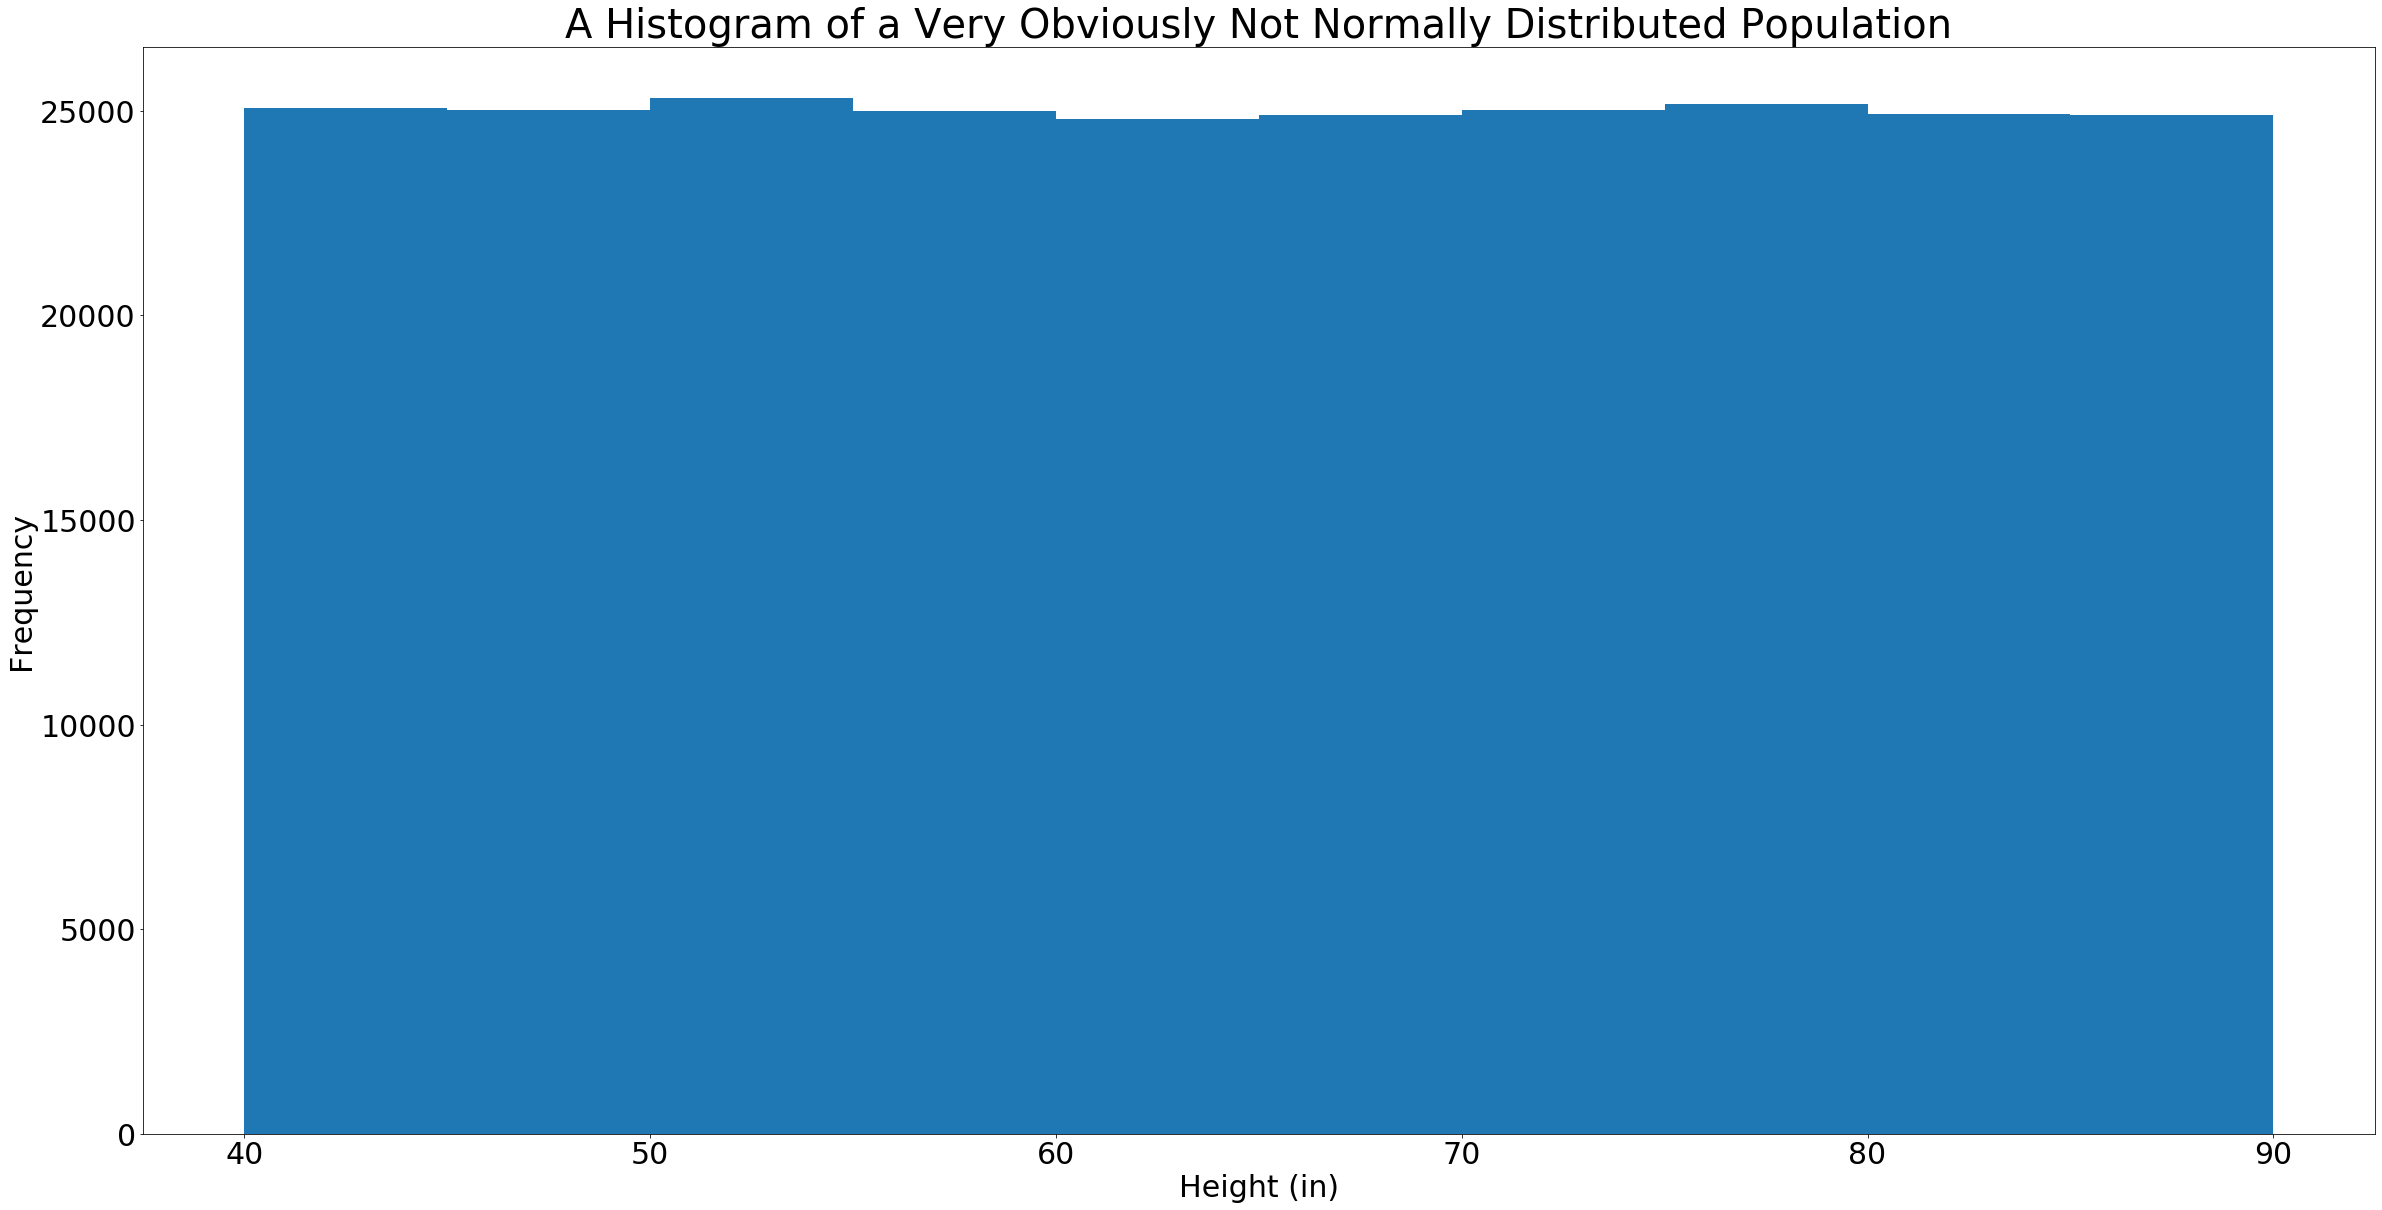

In [10]:
plt.figure(figsize=(40,20))
plt.title('A Histogram of a Very Obviously Not Normally Distributed Population', fontsize=40)
plt.xlabel('Height (in)', fontsize=30)
plt.ylabel('Frequency', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.hist(random_data, bins = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]);
plt.savefig('pop_heights.png')


Above we generated data about the heights of 250,000 people. The data we generated gave us a population that is uniformly distributed; meaning that every height is equally likely (weird world to imagine kind of). What is the mean height of this population?

In [30]:
np.mean(random_data)

64.46996

Again, the central limit theorem says that despite the shape of the population distribution, the sampling distribution will be normally distributed as long as the sample size n, is large enough (typically 30 or more). Let's build some sampling distributions and check it out.


In [24]:
# randomly pick 5 people from the above population, take their average, and repeat 10 times
n5 = [np.mean(np.random.choice(random_data, 5)) for x in range(10_000)]

# randomly pick 15 people from the above population, take their average, and repeat 10 times
n15 = [np.mean(np.random.choice(random_data, 15)) for x in range(10_000)]

# randomly pick 30 people, and do the same...
n30 = [np.mean(np.random.choice(random_data, 30)) for x in range(10_000)]

# randomly pick 100 people " " " " " "
n100 = [np.mean(np.random.choice(random_data, 100)) for x in range(10_000)]

In [29]:
np.mean(random_data)

64.46996

In [28]:
print(np.mean(n5))
print(np.mean(n15))
print(np.mean(n30))
print(np.mean(n100))


64.4544
64.50867333333333
64.48328333333333
64.469501


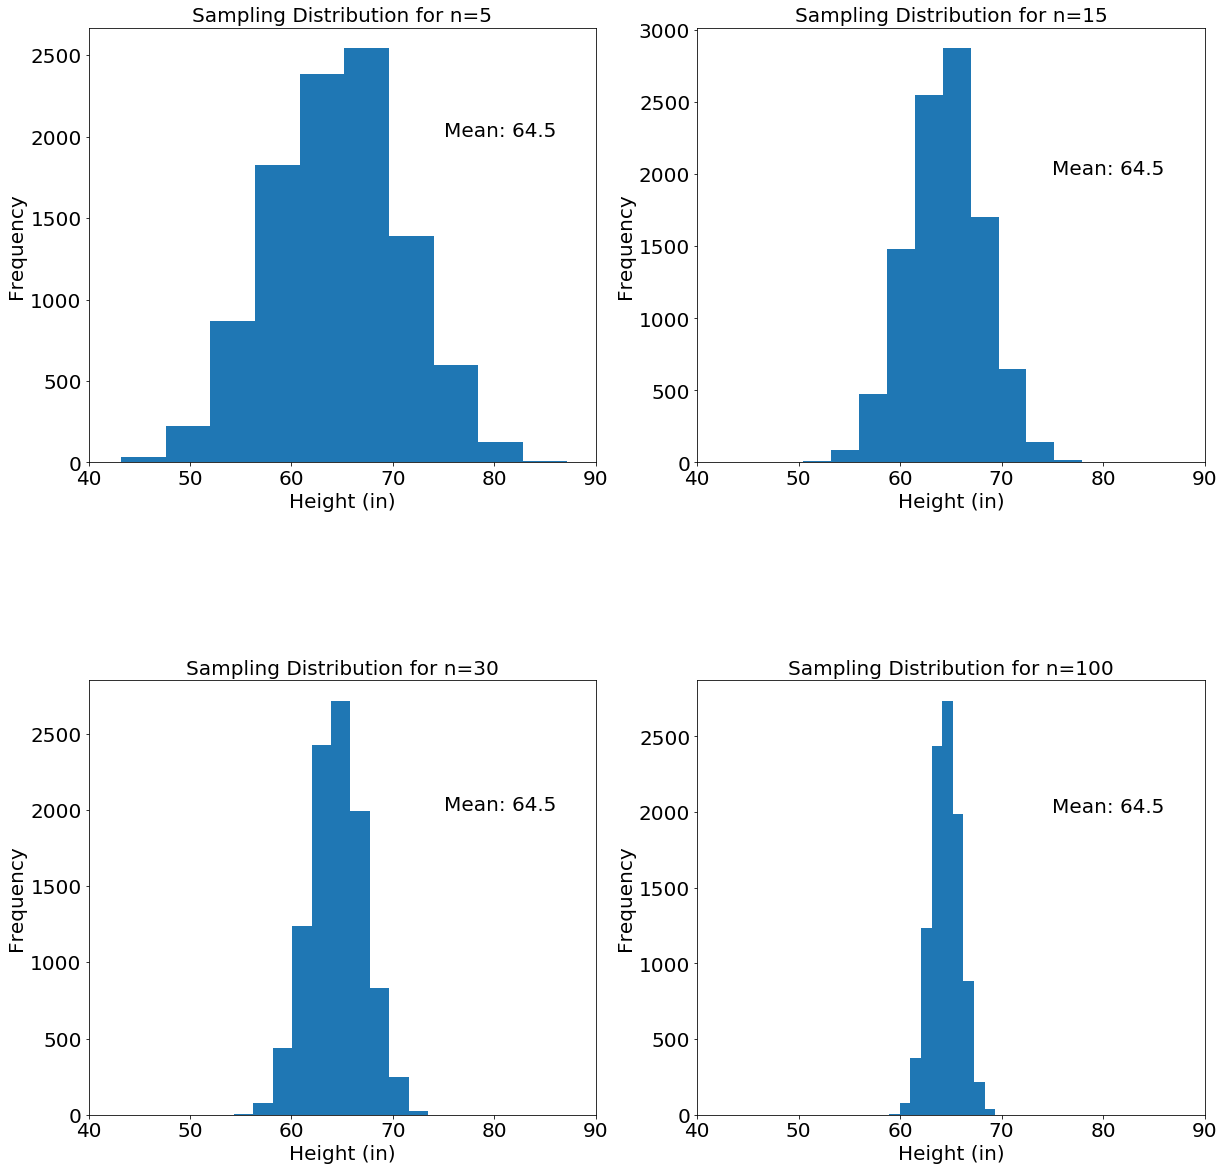

In [33]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=.5)
plots = [n5, n15, n30, n100]
labels = ['n=5', 'n=15', 'n=30', 'n=100']
counter = 0
for plot in plots:
    counter+=1
    plt.subplot(2,2,counter)
    plt.title(f'Sampling Distribution for {labels[counter-1]}', fontsize=20)
    plt.xlabel('Height (in)', fontsize=20)
    plt.ylabel('Frequency', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.text(75,2000, f'Mean: {round(np.mean(plot),1)}', fontsize=20)
    plt.xlim([40, 90])
    plt.hist(plot);
    plt.savefig('samp_dist.png')


# Observations

- Notice that as n gets larger, the mean of the sampling distribution tightens around the population mean of 64.5
- This is one reason why a large sample size is important in this estimation. If the sample size is too small as it is with n = 5, you risk any given sample landing between a mean of 45 and 80. Sometimes the normality of the sampling distribution is void too, with a small sample size.  

That is essentially what the central limit theorem is: even if the population distribution is not normally distributed itself, the distribution of sample means will be and the mean of the distribution of sample means will be equal to the population mean. 

Let's try another distribution and make it really skewed.



In [14]:

dist1 = list(np.random.laplace(loc=50, size=1000))
dist2 = list(np.random.exponential(size=1000) + 55)
dist3 = [np.random.randint(60, 100) for x in range(1000)]

exp = dist1+dist2+dist3



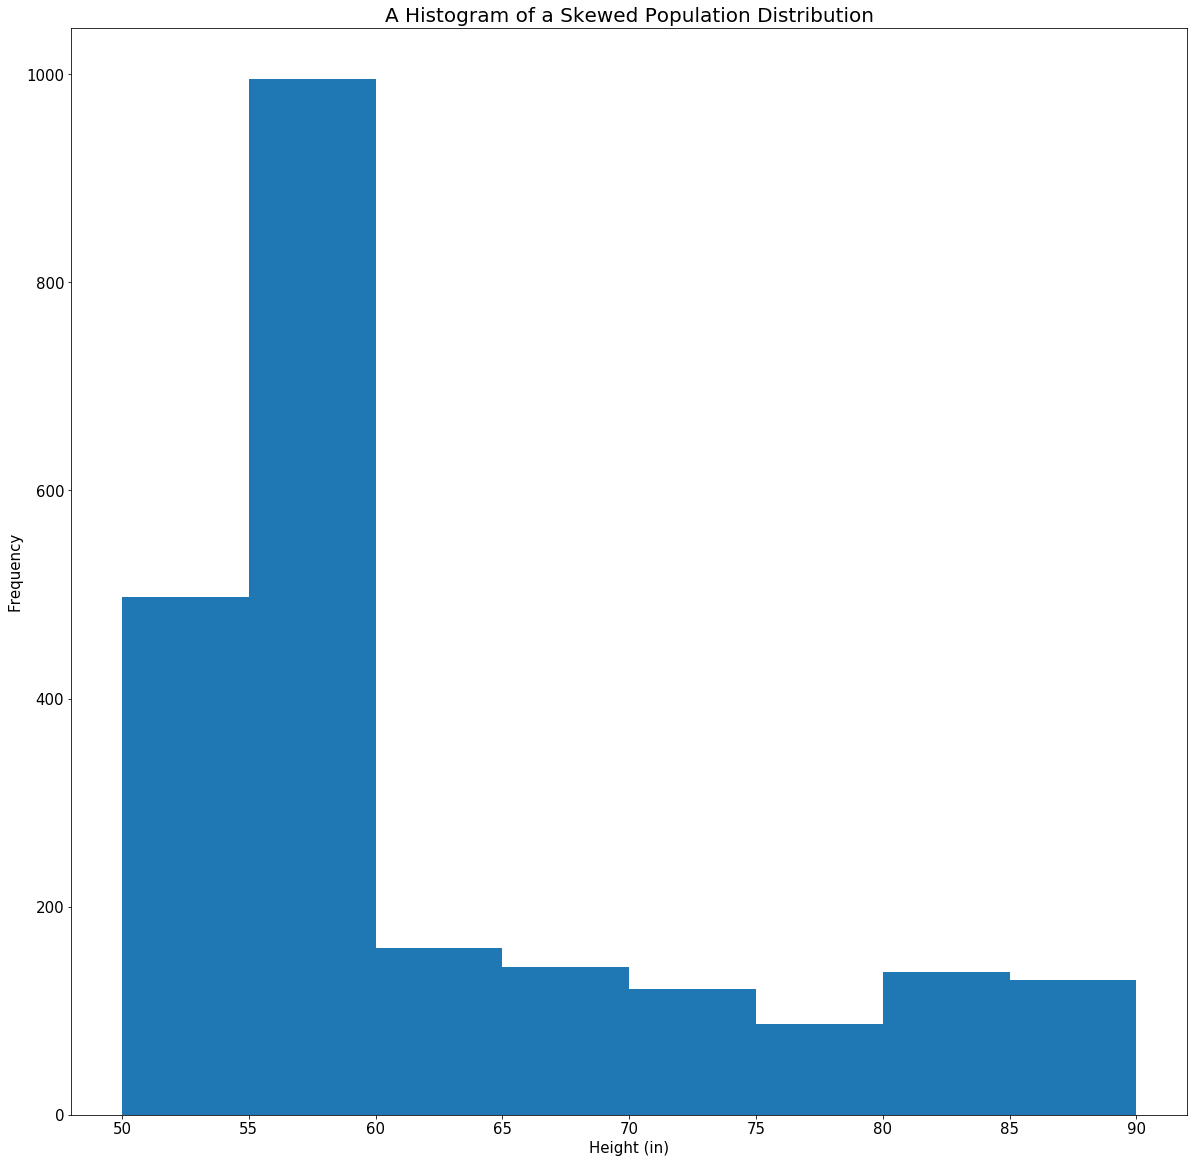

In [15]:
plt.figure(figsize=(20,20))
plt.title('A Histogram of a Skewed Population Distribution', fontsize=20)
plt.xlabel('Height (in)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.hist(exp, bins = [50, 55, 60, 65, 70, 75, 80, 85, 90]);
plt.savefig('skewed_pop.png')


In [16]:
n5 = [np.mean(np.random.choice(exp, 5)) for x in range(100)]
n15 = [np.mean(np.random.choice(exp, 15)) for x in range(100)]
n30 = [np.mean(np.random.choice(exp, 30)) for x in range(100)]
n100 = [np.mean(np.random.choice(exp, 100)) for x in range(100)]

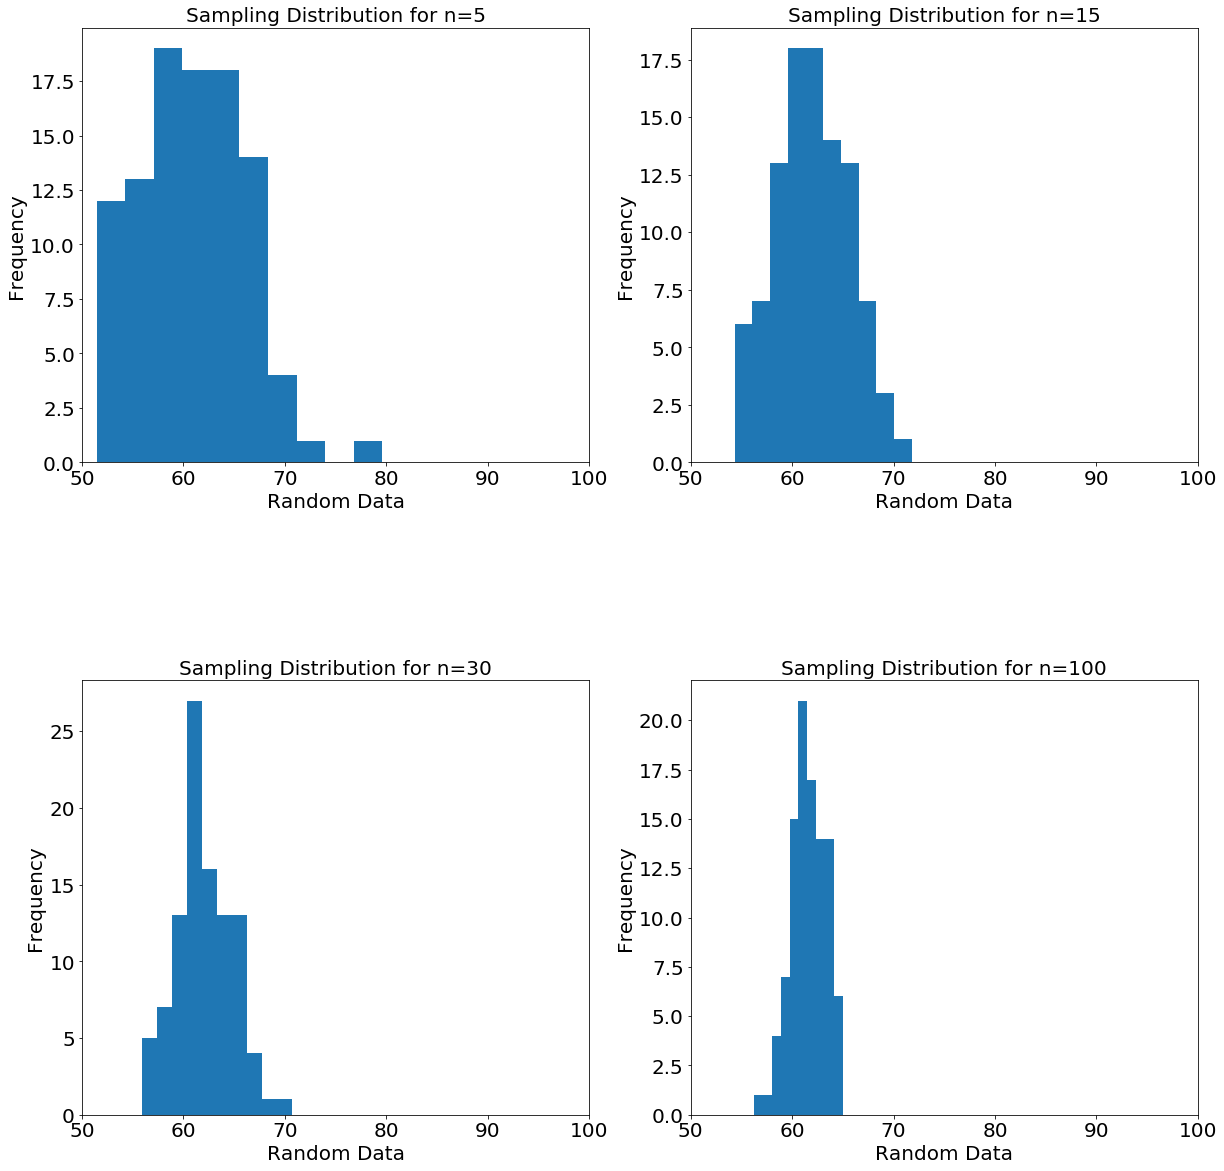

In [19]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=.5)
plots = [n5, n15, n30, n100]
labels = ['n=5', 'n=15', 'n=30', 'n=100']
counter = 0
for plot in plots:
    counter+=1
    plt.subplot(2,2,counter)
    plt.title(f'Sampling Distribution for {labels[counter-1]}', fontsize=20)
    plt.xlabel('Random Data', fontsize=20)
    plt.ylabel('Frequency', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlim([50,100])
    plt.savefig('samp_skewed.png')
    plt.hist(plot);

Still, the sampling distributions look normal. The higher the n the better the approximation to the normal distribution. 



# Main Takeaways

This whole process works for other parameters too. For example, the proportion of the population that supports candidate A or likes pizza or whatever. The population distribution does not matter so much, if the sample size is large. With a large sample size, you can still make a reasonable estimate. 

One reason why this is so important is that it allows for hypothesis testing and confidence intervals, which rely on the assumption of a normal distribution. The central limit theorem helps to make that assumption valid.